In [ ]:
from keras.datasets import imdb

In [ ]:
import numpy as np

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [ ]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [11]:
len(train_data)

25000

In [14]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [45]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
x_train[2]

array([0., 1., 1., ..., 0., 0., 0.])

In [18]:
y_train = np.asarray(train_labels).astype('float32')

In [19]:
y_test = np.asarray(test_labels).astype('float32')

In [20]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [23]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

In [25]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 24s 2ms/step - loss: 0.6938 - acc: 0.5038 - val_loss: 0.6936 - val_acc: 0.4977
Epoch 2/20
15000/15000 [==============================] - 7s 448us/step - loss: 0.6763 - acc: 0.5905 - val_loss: 0.7002 - val_acc: 0.5024
Epoch 3/20
15000/15000 [==============================] - 6s 386us/step - loss: 0.6293 - acc: 0.6659 - val_loss: 0.7111 - val_acc: 0.5091
Epoch 4/20
15000/15000 [==============================] - 5s 349us/step - loss: 0.5797 - acc: 0.7211 - val_loss: 0.7375 - val_acc: 0.5080
Epoch 5/20
15000/15000 [==============================] - 6s 383us/step - loss: 0.5395 - acc: 0.7443 - val_loss: 0.7588 - val_acc: 0.5082
Epoch 6/20
15000/15000 [==============================] - 5s 362us/step - loss: 0.4949 - acc: 0.7787 - val_loss: 0.8077 - val_acc: 0.5055
Epoch 7/20
15000/15000 [==============================] - 5s 358us/step - l

In [26]:
history_dict = history.history

In [36]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)

In [37]:
epochs

range(1, 21)

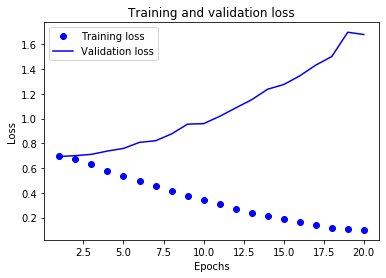

In [38]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

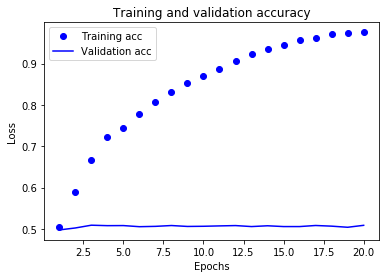

In [40]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 43s 2ms/step - loss: 0.4583 - acc: 0.8129
Epoch 2/4
25000/25000 [==============================] - 4s 158us/step - loss: 0.2630 - acc: 0.9090
Epoch 3/4
25000/25000 [==============================] - 4s 146us/step - loss: 0.2004 - acc: 0.9280
Epoch 4/4
25000/25000 [==============================] - 22s 876us/step


In [43]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 22s 885us/step


In [47]:
results

[0.29643853224754335, 0.88312]

In [48]:
model.predict(x_test)

array([[0.20701051],
       [0.99949116],
       [0.93810844],
       ...,
       [0.12765008],
       [0.09552789],
       [0.6776905 ]], dtype=float32)